# **Instalações e Bibliotecas**

In [1]:
%%capture

!pip install shap
!pip install optuna

In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer

# **Funções**

O arquivo 'functions_pred_cruzada' contém as funções que serão utilizadas para selecionar, pré-processar e treinar e validar os modelos de machine learning

In [3]:
!pip install --upgrade --no-cache-dir gdown --quiet
!gdown 1uVoArwRTJmvbyFLyFniwFvWGHMfiNIWO --quiet

from functions_pred_cruzada import *

# **Dados**

In [4]:
# Dados brutos com todos os tipos de câncer
!gdown 1AaEC5jTcInC2fwbVG7BW3BeJfXq5OBlO --quiet

df_geral = pd.read_csv('pacigeral_12_23.csv')
print(df_geral.shape)
df_geral.head(3)

<ipython-input-4-04168a9f1961>:4: DtypeWarning: Columns (23,24,25,32,36,37,73,74,75,78,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geral = pd.read_csv('pacigeral_12_23.csv')


(1178688, 100)


,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


**Tipos com maior incidência**

In [5]:
df_geral.TOPOGRUP.value_counts(normalize=True).head(15)

C44    0.228854
C50    0.136985
C61    0.103433
C34    0.047110
C53    0.046320
C18    0.038405
C42    0.037690
C16    0.036604
C20    0.029200
C73    0.023743
C77    0.018551
C15    0.018082
C67    0.017893
C64    0.015958
C32    0.015779
Name: TOPOGRUP, dtype: float64

*   C44 - Pele 22,88%
*   C50 - Mama 13,7%
*   C61 - Próstata 10,34%
*   C34 - Pulmão 4,71%
*   C53 - Colo de Útero 4,63%
*   C18 - Cólon 3,84%
*   C42 - ?? 3,77%
*   C16 - Estômago 3,66%
*   C20 - Reto 2,92%
*   C73 - Tiróide 2,37%
*   C77 - ?? 1,85%
*   C15 - Esôfago 1,81%
*   C67 - Bexiga 1,79%
*   C64 - Rim 1,59%
*   C32 - Laringe 1,58%



**Tipos com maior incidência por sexo**

In [6]:
df_masc = df_geral[df_geral.SEXO == 1]
df_fem = df_geral[df_geral.SEXO == 2]

print(df_masc.shape)
print(df_fem.shape)

(585417, 100)
(593271, 100)


In [7]:
df_masc.TOPOGRUP.value_counts(normalize=True).head(10)

C44    0.242531
C61    0.208253
C34    0.057234
C16    0.047406
C42    0.040819
C18    0.037650
C20    0.032604
C15    0.030290
C32    0.027686
C67    0.026477
Name: TOPOGRUP, dtype: float64

*   C44 - Pele 24,25%
*   C61 - Próstata 20,82%
*   C34 - Pulmão 5,72%
*   C16 - Estômago 4,74%
*   C42 - ?? 4,08%
*   C18 - Cólon 3,76%
*   C20 - Reto 3,26%
*   C15 - Esôfago 3,02%
*   C32 - Laringe 2,77%
*   C67 - Bexiga 2,65%

In [8]:
df_fem.TOPOGRUP.value_counts(normalize=True).head(10)

C50    0.270308
C44    0.215359
C53    0.092027
C18    0.039149
C73    0.037465
C34    0.037120
C42    0.034603
C54    0.029765
C16    0.025946
C20    0.025841
Name: TOPOGRUP, dtype: float64

*   C50 - Mama 27,03%
*   C44 - Pele 21,53%
*   C53 - Colo de Útero 9,20%
*   C18 - Cólon 3,91%
*   C73 - Tiróide 3,75%
*   C34 - Pulmão 3,71%
*   C42 - ?? 3,46%
*   C54 - Corpo do Útero 2,98%
*   C16 - Estômago 2,59%
*   C20 - Reto 2,58%

**Colorretal**

Seleção dos dados de câncer colorretal

In [9]:
# Colorretal - C18, C19, C20
colorretal = ['C18', 'C19', 'C20']

df_colo = data_prep(df_geral, colorretal)
print(df_colo.shape)
df_colo.head(3)

(61633, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30502,79,1,3518701,9,1,C199,C19,IIIB,E,0,...,2,2007,04,7,3518701,1,870,2.0,1,0
30509,68,2,3518701,9,1,C180,C18,IIA,E,0,...,2,2008,04,7,3518701,1,1493,2.0,1,0
30521,51,2,3518701,2,1,C180,C18,IIIA,E,0,...,0,2008,04,7,3518701,1,167,3.0,1,0


In [10]:
df_colo = get_labels(df_colo)
df_colo.shape

(61633, 32)

In [11]:
df_colo.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

**Pulmão**

Seleção dos dados de câncer de pulmão

In [12]:
# Pulmão - C34
pulmao = ['C34']

df_pulmao = data_prep(df_geral, pulmao)
print(df_pulmao.shape)
df_pulmao.head(3)

(38831, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30516,57,1,3518701,9,2,C349,C34,IV,C,0,...,0,2008,04,7,3518701,1,238,3.0,1,0
30535,52,2,3513504,9,1,C341,C34,IV,E,0,...,0,2008,04,7,3518701,1,498,3.0,0,0
30538,65,1,3518701,9,1,C349,C34,IV,E,0,...,0,2008,04,7,3518701,1,137,2.0,1,0


In [13]:
df_pulmao = get_labels(df_pulmao)
df_pulmao.shape

(38831, 32)

In [14]:
df_pulmao.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

**Mama**

Seleção dos dados de câncer de mama

In [15]:
# Mama - C50
mama = ['C50']

df_mama = data_prep(df_geral, mama)
print(df_mama.shape)
df_mama.head(3)

(118673, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30546,50,2,3518701,9,1,C500,C50,IIIA,I,0,...,0,2008,04,7,3518701,1,4,3.0,1,0
30548,41,2,3548500,9,1,C504,C50,IIIB,E,0,...,1,2008,04,7,3518701,1,2504,3.0,0,0
30550,33,2,3518701,9,1,C509,C50,IV,E,0,...,0,2008,04,7,3518701,1,237,4.0,1,0


In [16]:
df_mama = get_labels(df_mama)
df_mama.shape

(118673, 32)

In [17]:
df_mama.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

**Colo de Útero**

Seleção dos dados de câncer de colo de útero



In [18]:
# Colo de Útero - C53
colo_utero = ['C53']

df_colo_utero = data_prep(df_geral, colo_utero)
print(df_colo_utero.shape)
df_colo_utero.head(3)

(23525, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30506,56,2,3518701,9,2,C530,C53,IB1,G,0,...,0,2008,04,7,3518701,1,1014,1.0,1,0
30511,72,2,3518701,9,1,C539,C53,IIIB,C,0,...,0,2008,04,7,3518701,1,341,2.0,1,0
30518,63,2,3518701,9,1,C539,C53,IB1,E,0,...,0,2008,04,7,3518701,1,498,3.0,1,0


In [19]:
df_colo_utero = get_labels(df_colo_utero)
df_colo_utero.shape

(23525, 32)

In [20]:
df_colo_utero.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

**Próstata**

Seleção dos dados de câncer de próstata

In [21]:
# Próstata - C61
prostata = ['C61']

df_prostata = data_prep(df_geral, prostata)
print(df_prostata.shape)
df_prostata.head(3)

(95338, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30501,71,1,3518701,9,1,C619,C61,II,I,0,...,2,2007,04,7,3518701,1,780,2.0,1,0
30508,74,1,3518701,9,1,C619,C61,II,I,0,...,0,2008,04,7,3518701,1,2109,2.0,1,0
30513,78,1,3518701,9,1,C619,C61,II,I,0,...,0,2008,04,7,3518701,1,2586,3.0,1,0


In [22]:
df_prostata = get_labels(df_prostata)
df_prostata.shape

(95338, 32)

In [23]:
df_prostata.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

**Pele**

Seleção dos dados de câncer de pele

In [24]:
teste = df_geral[df_geral.TOPOGRUP == 'C44']
teste.shape

(269748, 100)

In [25]:
# Pele - C44 (Other malignant neoplasms of skin)
pele = ['C44']

df_pele = data_prep(df_geral, pele)
print(df_pele.shape)
df_pele.head(3)

(183682, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30510,42,1,3518701,9,2,C446,C44,IIIC,G,0,...,0,2008,04,7,3518701,1,250,3.0,1,0
30557,73,1,3518701,9,1,C443,C44,IV,E,0,...,0,2008,04,7,3518701,1,757,2.0,1,0
30720,43,2,3548708,9,1,C449,C44,IIIC,C,0,...,0,2010,01,1,3518701,1,556,4.0,0,0


In [26]:
df_pele = get_labels(df_pele)
df_pele.shape

(183682, 32)

In [27]:
df_pele.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

Salvando os dados no Drive

In [28]:
df_todos = pd.concat([df_colo, df_colo_utero, df_mama, df_pele, df_prostata,
                      df_pulmao], ignore_index=True)

df_todos.shape

(521682, 32)

In [ ]:
df_todos.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Predição cruzada/Datasets/mais_incid.csv',
                encoding='utf-8', index=False)

## **Informações**

In [29]:
def data_prep_v2(df, topogrup):
    df_aux = df.copy()

    # TOPOGRUP
    df_aux = df_aux[df_aux.TOPOGRUP.isin(topogrup)]

    # IDADE > 19
    df_aux = df_aux[df_aux.IDADE > 19]

    # Somente residentes do estado de SP
    df_aux = df_aux[df_aux.UFRESID == 'SP']

    # ECGRUP sem 0, X e Y
    df_aux = df_aux[~df_aux.ECGRUP.isin(['0','X','Y'])]

    # ANODIAG até 2019 e em categorias de 5 em 5 anos
    df_aux = df_aux[df_aux.ANODIAG < 2020]

    # Somente com confirmação microscópica
    df_aux = df_aux[df_aux.BASEDIAG == 3]

    list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']

    for col_data in list_datas:
        df_aux[col_data] = pd.to_datetime(df_aux[col_data])

    df_aux['CONSDIAG'] = (df_aux.DTDIAG - df_aux.DTCONSULT).dt.days
    df_aux['DIAGTRAT'] = (df_aux.DTTRAT - df_aux.DTDIAG).dt.days
    df_aux['TRATCONS'] = (df_aux.DTTRAT - df_aux.DTCONSULT).dt.days
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days
    df_aux['ULTITRAT'] = (df_aux.DTULTINFO - df_aux.DTTRAT).dt.days

    print(df_aux.shape)

    df_aux['obito_geral'] = 0
    df_aux['sobrevida_ano3'] = 0

    df_aux.loc[df_aux.ULTINFO > 2, 'obito_geral'] = 1
    df_aux.loc[df_aux.ULTIDIAG > 3*365, 'sobrevida_ano3'] = 1

    df_aux_3anos = df_aux[~((df_aux.obito_geral == 0) & (df_aux.sobrevida_ano3 == 0))]

    return df_aux_3anos

In [30]:
df_colo = data_prep_v2(df_geral, colorretal)
df_pulmao = data_prep_v2(df_geral, pulmao)
df_mama = data_prep_v2(df_geral, mama)
df_colo_utero = data_prep_v2(df_geral, colo_utero)
df_prostata = data_prep_v2(df_geral, prostata)
df_pele = data_prep_v2(df_geral, pele)

(61633, 102)
(38831, 102)
(118673, 102)
(23525, 102)
(95338, 102)
(183682, 102)


In [31]:
import plotly.graph_objects as go

grup_ec = np.sort(df_pele.ECGRUP.unique())

fig = go.Figure(data=[
    go.Bar(name='Colorretal', x=grup_ec, y=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Pulmão', x=grup_ec, y=df_pulmao.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_pulmao.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Mama', x=grup_ec, y=df_mama.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_mama.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Colo de Útero', x=grup_ec, y=df_colo_utero.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_colo_utero.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Próstata', x=grup_ec, y=df_prostata.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_prostata.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Pele', x=grup_ec, y=df_pele.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_pele.ECGRUP.value_counts(normalize=True).sort_index()*100)
])
# Change the bar mode
fig.update_layout(barmode='group', yaxis_title='% Pacientes',
                  xaxis_title='Estadiamento Clínico')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()

In [32]:
import matplotlib.pyplot as plt

def plot_survs(list_dfs):
    """
    """
    plt.figure(figsize=(10, 6))

    for i, df in enumerate(list_dfs):

        df_aux = df.copy()
        nomes = ['Colorretal', 'Colo de Útero', 'Mama', 'Pele', 'Próstata', 'Pulmão']
        colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

        soma = 1
        val = df_aux['obito_geral'].values.copy()
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]
            val[j] = soma

        df_aux['perc'] = val
        df_aux = df_aux[df_aux.meses_trat >= 0]

        plt.plot(df_aux.meses_trat[:220], df_aux.perc[:220], color=colors[i], label=nomes[i])
        plt.vlines(12, 0, 1, colors='k', linestyle='dotted')
        plt.vlines(36, 0, 1, colors='k', linestyle='dotted')
        plt.vlines(60, 0, 1, colors='k', linestyle='dotted')
        plt.legend()
        plt.xlabel('Meses', size=12)
        plt.xticks(np.linspace(0, 220, 12))
        plt.yticks(np.linspace(0, 1, 11))
        plt.ylabel('Porcentagem de sobrevivência', size=12)
        plt.ylim([0, 1.])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.show()

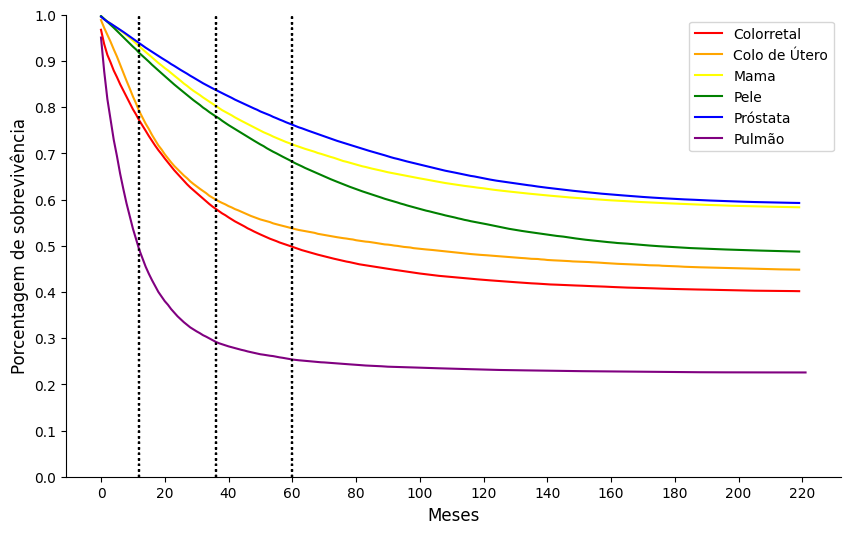

In [33]:
plot_survs([df_colo, df_colo_utero, df_mama, df_pele, df_prostata, df_pulmao])

In [46]:
def plotly_survs(list_dfs):
    """
    """
    fig = go.Figure()

    for i, df in enumerate(list_dfs):

        df_aux = df.copy()
        nomes = ['Colorretal', 'Colo de Útero', 'Mama', 'Pele', 'Próstata', 'Pulmão']
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

        soma = 1
        val = df_aux['obito_geral'].values.copy()
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]
            val[j] = soma

        df_aux['perc'] = val
        df_aux = df_aux[df_aux.meses_trat >= 0]

        fig.add_trace(go.Scatter(x = df_aux.meses_trat[:220],
                                 y = df_aux.perc[:220],
                                 name = nomes[i]))

        fig.update_layout(yaxis_title='Porcentagem de Sobrevivência',
                          xaxis_title='Meses', xaxis = dict(tickmode = 'linear',
                                                            tick0=0,
                                                            dtick=20)
                          )
    fig.add_vline(x=12, line_dash='dot', annotation_text='1 Ano',
                  annotation_position='bottom right')
    fig.add_vline(x=36, line_dash='dot', annotation_text='3 Anos',
                  annotation_position='bottom right')
    fig.add_vline(x=60, line_dash='dot', annotation_text='5 Anos',
                  annotation_position='bottom right')
    fig.show()

In [47]:
plotly_survs([df_colo, df_colo_utero, df_mama, df_pele, df_prostata, df_pulmao])